In [1]:
import os
import conda
conda_file_dir = conda.__file__
conda_dir = conda_file_dir.split('lib')[0]
proj_lib = os.path.join(os.path.join(conda_dir, 'share'), 'proj')
os.environ["PROJ_LIB"] = proj_lib
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

/Users/mac/opt/anaconda3/envs/regularenv/lib/python3.6/site-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  
/Users/mac/opt/anaconda3/envs/regularenv/lib/python3.6/site-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  # This is added back by InteractiveShellApp.init_path()
/Users/mac/opt/anaconda3/envs/regularenv/lib/python3.6/site-packages/ipykernel_launcher.py:13: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  del sys.path[0]
/Users/mac/opt/anaconda3/envs/regularenv/lib/python3.6/site-packages/ipykernel_launcher.py:14: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use 

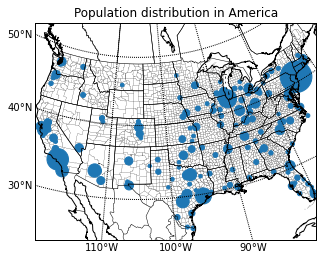

In [2]:
#散點 Basemap.scatter()
#畫大圓弧 Basemap.drawgreatcircle()
#畫熱力圖 Basemap.pcolormesh()
#等值線圖 Basemap.contourf()和Basemap.contour()
map = Basemap(projection='stere',lat_0=90,lon_0=-105, #lat_0,lon_0 >>>cener of desired map domain
            llcrnrlat=23.41 ,llcrnrlon=-118.67,#左下角定位
            urcrnrlat=45.44,urcrnrlon=-64.52,#右下角定位
            rsphere=6371200.,resolution='l',area_thresh=10000)

map.drawmapboundary()   # 繪製邊界
map.drawstates()        # 繪製州
map.drawcoastlines()    # 繪製海岸線
map.drawcountries()     # 繪製國家
map.drawcounties()      # 繪製縣

parallels = np.arange(0.,90,10.) 
map.drawparallels(parallels,labels=[1,0,0,0],fontsize=10) # 繪製緯線

meridians = np.arange(-110.,-60.,10.)
map.drawmeridians(meridians,labels=[0,0,0,1],fontsize=10) # 繪製經線


posi=pd.read_csv("2014_us_cities.csv") # 讀取數據

# 原始資料有3228組資料，選擇了280個城市的資料
lat = np.array(posi["lat"][0:280]) # 獲取維度之維度值
lon = np.array(posi["lon"][0:280]) # 獲取經度值
pop = np.array(posi["pop"][0:280],dtype=float)  # 獲取人口數，轉化為numpy浮點型

size=(pop/np.max(pop))*1000 # 繪製散點圖時圖形的大小，如果之前pop不轉換為浮點型會沒有大小不一的效果
x,y = map(lon,lat)

map.scatter(x,y,s=size)     # 也可以使用Basemap的methord本身的scatter
plt.title('Population distribution in America')
plt.show()

#由圖可以直觀看出紐約、三藩市、芝加哥、華盛頓是美國人口數量最多的城市。


enter reference longitude (lon_0):120


/Users/mac/opt/anaconda3/envs/regularenv/lib/python3.6/site-packages/ipykernel_launcher.py:28: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
/Users/mac/opt/anaconda3/envs/regularenv/lib/python3.6/site-packages/ipykernel_launcher.py:32: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.


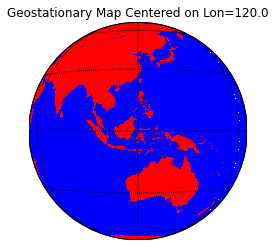

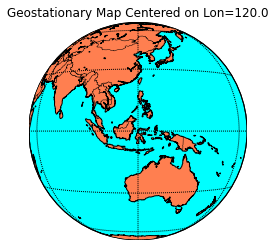

In [3]:
from __future__ import (absolute_import, division, print_function)
import sys

def get_input(prompt):
    if sys.hexversion > 0x03000000:
        return input(prompt)
    else:
        return raw_input(prompt)

# 為地球靜止(衛星視圖)投影創建底圖實例。
lon_0 = float(get_input('enter reference longitude (lon_0):'))

#繪製有陸地/海面遮罩的地圖。
fig=plt.figure()
m = Basemap(projection='geos',lon_0=lon_0,rsphere=(6378137.00,6356752.3142),resolution=None)
# 繪製 land-sea 遮罩, 顏色: land red, oceans blue.
# lakes=True: 表示真實塗色, 給定 ocean color.
m.drawlsmask(land_color='red',ocean_color='blue',lakes=True)
# 繪製經緯度
m.drawparallels(np.arange(-90.,120.,30.))
m.drawmeridians(np.arange(0.,420.,60.))
m.drawmapboundary()
plt.title('Geostationary Map Centered on Lon=%s' % (lon_0))

# 會至第貳個地圖
# 繪製和填充大陸的地圖。
fig = plt.figure()
m = Basemap(projection='geos',lon_0=lon_0,rsphere=(6378137.00,6356752.3142),resolution='l')
m.drawcoastlines()
m.fillcontinents(color='coral',lake_color='aqua')
m.drawmapboundary(fill_color='aqua')
m.drawcountries()
# 繪製經緯度
m.drawparallels(np.arange(-90.,120.,30.))
m.drawmeridians(np.arange(0.,420.,60.))
plt.title('Geostationary Map Centered on Lon=%s' % (lon_0))
plt.show()

odict_keys(['amountofprecip', 'lat', 'lon', 'true_lat', 'true_lon', 'timeofdata', 'timeofcreation', 'hrap_xor', 'hrap_yor'])


/Users/mac/opt/anaconda3/envs/regularenv/lib/python3.6/site-packages/ipykernel_launcher.py:33: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
/Users/mac/opt/anaconda3/envs/regularenv/lib/python3.6/site-packages/ipykernel_launcher.py:42: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
/Users/mac/opt/anaconda3/envs/regularenv/lib/python3.6/site-packages/ipykernel_launcher.py:43: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.


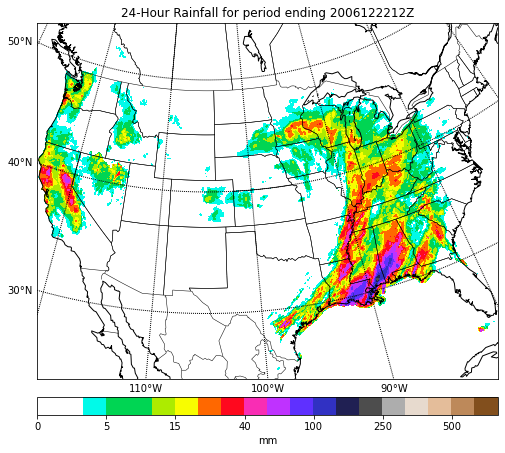

In [4]:
from mpl_toolkits.basemap import cm
from netCDF4 import Dataset as NetCDFFile
#導入netCDF4中的Dataset處理網路通用
#資料格式（net common data form）

nc = NetCDFFile('nws_precip_conus_20061222.nc')
#首先在http://water.weather.gov/precip/中下載2006年12月22日的美國本土
#（不含阿拉斯加與夏威夷）的降水量數據
#導入我們需要用到的dataset， 值得注意的是該網站17年3月後的資料格式更新， 
#通過查詢變數名發現資料格式與之前有很大差異

print(nc.variables.keys())
# 輸出查看資料中的變數名

# 取得變數的值, 並放入陣列
prcpvar = nc.variables['amountofprecip']
data = 0.01*prcpvar[:]
latcorners = nc.variables['lat'][:]
loncorners = -nc.variables['lon'][:]
lon_0 = -nc.variables['true_lon'].getValue()
lat_0 = nc.variables['true_lat'].getValue()
# 標準化降水量與提取經緯度參數

fig = plt.figure(figsize=(8,8))
ax = fig.add_axes([0.1,0.1,0.8,0.8])
#創建圖像物件，設置圖像大小與軸線起始位置 
# create polar stereographic Basemap instance.
                   
                   
m = Basemap(projection='stere',lon_0=lon_0,lat_0=90.,lat_ts=lat_0,\
            llcrnrlat=latcorners[0],urcrnrlat=latcorners[2],\
            llcrnrlon=loncorners[0],urcrnrlon=loncorners[2],\
            rsphere=6371200.,resolution='l',area_thresh=10000)

#畫立體投影圖， 設置圖形上下左右四個邊界點經緯度參數座標，中心點經緯度參
#數座標,定義地圖投影的球面半徑(預設值為6370997米，近似於地球的半徑），
#解析度以及閾值 
# 注: area_thresh = 10000 意味著面積小於10000平方公里的湖泊等對象將不被作圖
                   
                   
m.drawcoastlines()
m.drawstates()
m.drawcountries()
# 畫海岸線，州界， 國界線
                   
parallels = np.arange(0.,90,10.) #<<<<<<<<<
m.drawparallels(parallels,labels=[1,0,0,0],fontsize=10)
#以10度為間隔畫出0度到北緯90度緯線， 並且在圖像左側設置緯線標籤
                   
meridians = np.arange(180.,360.,10.)  #<<<<<<<<<
#以10度為間隔畫出西經180度到本初子午線經線， 並且在圖像下側設置經線標籤
                   
m.drawmeridians(meridians,labels=[0,0,0,1],fontsize=10)
            #labels [left, right, top ,bottom]  1 menas show, 0 means not show
ny = data.shape[0]; nx = data.shape[1]
lons, lats = m.makegrid(nx, ny)
# 經緯線空間均勻
                   
x, y = m(lons, lats) 
clevs = [0,1,2.5,5,7.5,10,15,20,30,40,50,70,100,150,200,250,300,400,500,600,750]
cs = m.contourf(x,y,data,clevs,cmap=cm.s3pcpn)
# 添加參數表，以x,y為基準畫出data的輪廓線，等輪廓線參數為clevs，填充顏色畫出填充後的輪廓線
                   
cbar = m.colorbar(cs,location='bottom',pad="5%")
#添加色標, 每個色標占5%（一共20個色標）
                   
cbar.set_label('mm')
# 添加標籤 單位：毫米
                   
plt.title(prcpvar.long_name+' for period ending '+prcpvar.dateofdata)
# 添加圖像名
                   
plt.show()
#plt.savefig('24hrs rainfall of 20061222 for CONUS.jpg')

# HW

/Users/mac/opt/anaconda3/envs/regularenv/lib/python3.6/site-packages/ipykernel_launcher.py:20: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.


warp to orthographic map ...


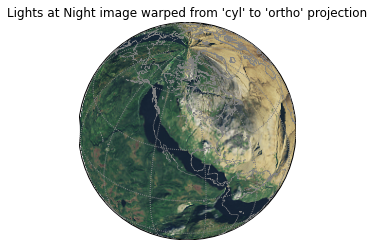

In [5]:
#作業 1：
'''
延續使用者資料的導入使用，除了， "文字檔"，"網路資訊"，還有圖像檔；

所以嘗試使用一張"earth_lights_lrg.jpg" 搭配不同的投影方式繪製地圖

來自美國宇航局的大理石圖像 (http://visibleearth.nasa.gov)

使用地圖投影：

說明使用 warpimage method 方法顯示圖像背景。
在地圖投影區域。 預設背景是『藍色』
'''

# 說明使用warpimage method 方法顯示圖像背景。

# 建立新圖像
fig=plt.figure()
# 定義以北美為中心的正交投影.
m = Basemap(projection='ortho',lat_0=40,lon_0=-100,resolution='l')
# 顯示非預設影像 - 匯入要使用的IMAGE
m.warpimage(image='grosmornezm_oli_2017276_front.jpg')
# 繪製海岸線。
m.drawcoastlines(linewidth=0.5,color='0.5')
# 每 30 度繪製一組 lat/lon 網格線。
m.drawmeridians(np.arange(0,360,30),color='0.5')
m.drawparallels(np.arange(-90,90,30),color='0.5')
#添加圖示標題
plt.title("Lights at Night image warped from 'cyl' to 'ortho' projection",fontsize=12)
print('warp to orthographic map ...')

odict_keys(['ETOPO05_X', 'ETOPO05_Y', 'ROSE'])


/Users/mac/opt/anaconda3/envs/regularenv/lib/python3.6/site-packages/ipykernel_launcher.py:40: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.


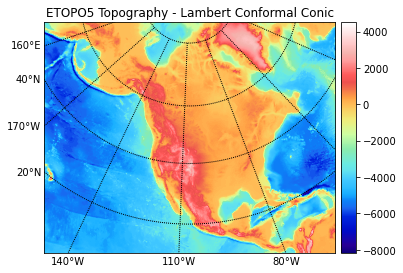

In [6]:
#作業 2：
from mpl_toolkits.basemap import Basemap, shiftgrid, cm
import numpy as np
import matplotlib.pyplot as plt
from netCDF4 import Dataset

#讀入 etopo5 地形/降水量資料集："etopo5.cdf". 繪製分布圖


# 讀入 etopo5 地形/降水量。.
#url = 'https://github.com/NOAA-PMEL/FerretDatasets/blob/master/data/etopo5.cdf'
# 要確認資料集所在路徑
etopodata = Dataset('etopo5.cdf')


# 取得資料集裡的資料定義, 使用variables.keys()
print(etopodata.variables.keys())

# 匯入資料 使用variables['keys'][:]
topoin = etopodata.variables['ROSE'][:]
lons = etopodata.variables['ETOPO05_X'][:]
lats = etopodata.variables['ETOPO05_Y'][:]

# 移位資料, 使 lon 從 - 180 到 180, 而不是 20 到 380 
topoin,lons = shiftgrid(180.,topoin,lons,start=False)

# 繪製地形/降水量
# 創建圖形和軸實例
fig = plt.figure()
ax = fig.add_axes([0.1,0.1,0.8,0.8])

#設定地理資訊圖('lcc' = lambert conformal conic).
# 使用 Wgs84 橢圓體的主要和次要球體半徑, 做基礎的底圖
# 請填入 resolution='??',area_thresh=???.,projection='??'
# area_thresh 為一數字, 低於這個數字不呈現

m = Basemap(llcrnrlon=-145.5,llcrnrlat=1.,urcrnrlon=-2.566,urcrnrlat=46.352,\
            rsphere=(6378137.00,6356752.3142),\
            resolution='l',area_thresh=1000.,projection='lcc',\
            lat_1=50.,lon_0=-107.,ax=ax)

# 轉換為 nx x ny 定期分空 5km 本機投影網格
nx = int((m.xmax-m.xmin)/5000.)+1; ny = int((m.ymax-m.ymin)/5000.)+1
topodat = m.transform_scalar(topoin,lons,lats,nx,ny)
# plot image over map with imshow.
im = m.imshow(topodat,cm.GMT_haxby)
#劃定海岸線和邊境界限, 總共需要3個參數
 

# 繪製經緯線
# 設定地圖左側和底部的標籤
parallels = np.arange(0.,80,20.)
m.drawparallels(parallels,labels=[1,0,0,1])
meridians = np.arange(10.,360,30.)
m.drawmeridians(meridians,labels=[1,0,0,1])


# 加入 colorbar
cb = m.colorbar(im,"right", size="5%", pad='2%')
ax.set_title('ETOPO5 Topography - Lambert Conformal Conic')
plt.show()